In [1]:
import pybrain

In [2]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised import BackpropTrainer
from pybrain.structure.modules import SigmoidLayer

In [3]:
network = buildNetwork(2, 3, 1, outclass = SigmoidLayer, hiddenclass = SigmoidLayer, bias = False)

In [4]:
network

<FeedForwardNetwork 'FeedForwardNetwork-5'>

In [5]:
network['in']

<LinearLayer 'in'>

In [6]:
network['hidden0']

<SigmoidLayer 'hidden0'>

In [7]:
network['out']

<SigmoidLayer 'out'>

In [8]:
network['bias']

In [9]:
dataset = SupervisedDataSet(2, 1)
dataset.addSample((0,0), (0,))
dataset.addSample((0,1), (1,))
dataset.addSample((1,0), (1,))
dataset.addSample((1,1), (0,))

In [10]:
dataset['input']

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

In [11]:
dataset['target']

array([[0.],
       [1.],
       [1.],
       [0.]])

In [12]:
optimizer = BackpropTrainer(module=network, dataset=dataset, learningrate=0.1)

In [13]:
epochs = 30000
error = []
for epoch in range(epochs):
  error_average = optimizer.train()
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(error_average))
    error.append(error_average)

Epoch: 1 Error: 0.15540428276478935
Epoch: 1001 Error: 0.0991027362103368
Epoch: 2001 Error: 0.07991074156839803
Epoch: 3001 Error: 0.07018118351460942
Epoch: 4001 Error: 0.0544570502179168
Epoch: 5001 Error: 0.03427350900447778
Epoch: 6001 Error: 0.022291980618511054
Epoch: 7001 Error: 0.015963076609010488
Epoch: 8001 Error: 0.012265887332991695
Epoch: 9001 Error: 0.009887393260869282
Epoch: 10001 Error: 0.008243830556063333
Epoch: 11001 Error: 0.0070481425592198955
Epoch: 12001 Error: 0.006141390754074407
Epoch: 13001 Error: 0.005433058233132297
Epoch: 14001 Error: 0.004864981310987329
Epoch: 15001 Error: 0.004400136095975337
Epoch: 16001 Error: 0.004013104760742079
Epoch: 17001 Error: 0.0036864280764154116
Epoch: 18001 Error: 0.003407232412612739
Epoch: 19001 Error: 0.003165840535007876
Epoch: 20001 Error: 0.0029553157644014202
Epoch: 21001 Error: 0.0027701463873559735
Epoch: 22001 Error: 0.0026060764870668076
Epoch: 23001 Error: 0.002459726329437176
Epoch: 24001 Error: 0.0023284908

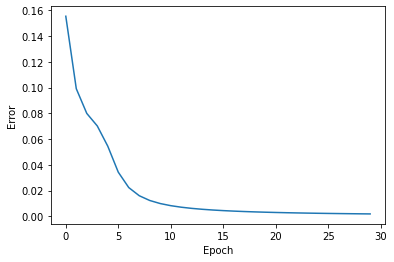

In [14]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(error)

In [15]:
network.params

array([  0.83933979,  -1.55572276,  -5.90915703,  -6.4909394 ,
         8.43274626,  -4.22821338,  15.42609887, -13.59592392,
        -7.97271814])

In [16]:
network.activate([0,0])

array([0.04430795])

In [17]:
network.activate([0,1])

array([0.9277759])

In [18]:
network.activate([1,0])

array([0.94073591])

In [19]:
network.activate([1,1])

array([0.05771347])